In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 设置可视化样式
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [40]:
# 1. 数据读取
# ============================================
print("=" * 50)
print("Step 1: Loading Dataset")
print("=" * 50)

df = pd.read_csv('sentimentdataset.csv')

print(f"\nDataset loaded successfully!")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")

Step 1: Loading Dataset

Dataset loaded successfully!
Total rows: 732
Total columns: 15


In [41]:
# 2. 数据基本信息
# ============================================
print("\n" + "=" * 50)
print("Step 2: Basic Dataset Information")
print("=" * 50)

# 查看前几行
print("\n--- First 5 rows ---")
print(df.head())

# 查看数据类型和非空值数量
print("\n--- Dataset Info ---")
print(df.info())

# 查看数值列的统计摘要
print("\n--- Statistical Summary ---")
print(df.describe())

# 查看所有列名
print("\n--- Column Names ---")
print(df.columns.tolist())


Step 2: Basic Dataset Information

--- First 5 rows ---
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

          

In [42]:
# 3. 数据质量检查
# ============================================
print("Step 3: Data Quality Check")
print("=" * 50)

# 检查缺失值
print("\n--- Missing Values ---")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0])

if missing.sum() == 0:
    print("No missing values found!")

# 检查重复行
duplicates = df.duplicated().sum()
print(f"\n--- Duplicate Rows ---")
print(f"Number of duplicate rows: {duplicates}")

# 检查唯一值
print("\n--- Unique Values per Column ---")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Step 3: Data Quality Check

--- Missing Values ---
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []
No missing values found!

--- Duplicate Rows ---
Number of duplicate rows: 0

--- Unique Values per Column ---
Unnamed: 0.1: 732 unique values
Unnamed: 0: 732 unique values
Text: 707 unique values
Sentiment: 279 unique values
Timestamp: 683 unique values
User: 685 unique values
Platform: 4 unique values
Hashtags: 697 unique values
Retweets: 26 unique values
Likes: 38 unique values
Country: 115 unique values
Year: 14 unique values
Month: 12 unique values
Day: 31 unique values
Hour: 22 unique values


In [43]:
# 4. 数据清洗
# ============================================
print("\n" + "=" * 50)
print("Step 4: Data Cleaning")
print("=" * 50)

# 处理缺失值
if df.isnull().sum().sum() > 0:
    print("\nHandling missing values...")
    # 根据列的类型选择填充方法
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype in ['int64', 'float64']:
                df[col].fillna(df[col].median(), inplace=True)
                print(f"  - Filled {col} with median")
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)
                print(f"  - Filled {col} with mode")

# 删除重复行
if duplicates > 0:
    print(f"\nRemoving {duplicates} duplicate rows...")
    df = df.drop_duplicates()
    print(f"Remaining rows: {len(df)}")

# 转换时间戳列
if 'Timestamp' in df.columns:
    print("\nConverting Timestamp column to datetime...")
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # 提取时间特征
    df['Year'] = df['Timestamp'].dt.year
    df['Month'] = df['Timestamp'].dt.month
    df['Day'] = df['Timestamp'].dt.day
    df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
    df['Hour'] = df['Timestamp'].dt.hour
    print("  - Extracted: Year, Month, Day, DayOfWeek, Hour")


# 清理所有文本列的空格
text_columns = df.select_dtypes(include=['object']).columns

for col in text_columns:
    if col in df.columns:
        # 去除前后空格
        df[col] = df[col].str.strip()
        # 去除多余的空格
        df[col] = df[col].str.replace(r'\s+', ' ', regex=True)

print("\n✓ Removed extra spaces from text columns")

# 检查重复的情感标签
if 'Sentiment' in df.columns:
    print(f"\nBefore cleaning - Unique sentiments: {df['Sentiment'].nunique()}")
    print(df['Sentiment'].value_counts().head(10))
    
    # 标准化大小写
    df['Sentiment'] = df['Sentiment'].str.title()
    
    print(f"\nAfter cleaning - Unique sentiments: {df['Sentiment'].nunique()}")

#检查国家列的重复
if 'Country' in df.columns:
    print(f"\nBefore cleaning - Unique countries: {df['Country'].nunique()}")
    duplicates = df['Country'].value_counts()
    print("\nCountries that appear multiple times:")
    print(duplicates[duplicates.index.duplicated(keep=False)])
    
    print(f"\nAfter cleaning - Unique countries: {df['Country'].nunique()}")

# 保存清洗后的数据
df.to_csv('sentimentdataset_cleaned_v2.csv', index=False)
print("\n✓ Saved cleaned data as 'sentimentdataset_cleaned_v2.csv'")


Step 4: Data Cleaning

Converting Timestamp column to datetime...
  - Extracted: Year, Month, Day, DayOfWeek, Hour

✓ Removed extra spaces from text columns

Before cleaning - Unique sentiments: 191
Sentiment
Positive       45
Joy            44
Excitement     37
Contentment    19
Neutral        18
Gratitude      18
Curiosity      16
Serenity       15
Happy          14
Nostalgia      11
Name: count, dtype: int64

After cleaning - Unique sentiments: 191

Before cleaning - Unique countries: 33

Countries that appear multiple times:
Series([], Name: count, dtype: int64)

After cleaning - Unique countries: 33

✓ Saved cleaned data as 'sentimentdataset_cleaned_v2.csv'


In [44]:
# 5. 特征工程（基础）
# ============================================
print("\n" + "=" * 50)
print("Step 5: Basic Feature Engineering")
print("=" * 50)

# 如果有 Likes 和 Retweets 列，创建总参与度
if 'Likes' in df.columns and 'Retweets' in df.columns:
    df['Total_Engagement'] = df['Likes'] + df['Retweets']
    print("Created 'Total_Engagement' column (Likes + Retweets)")

# 如果有文本列，创建文本长度特征
if 'Text' in df.columns:
    df['Text_Length'] = df['Text'].str.len()
    df['Word_Count'] = df['Text'].str.split().str.len()
    print("Created 'Text_Length' and 'Word_Count' columns")

# 如果有 Hashtags 列，统计标签数量
if 'Hashtags' in df.columns:
    df['Hashtag_Count'] = df['Hashtags'].str.split().str.len()
    print("Created 'Hashtag_Count' column")


Step 5: Basic Feature Engineering
Created 'Total_Engagement' column (Likes + Retweets)
Created 'Text_Length' and 'Word_Count' columns
Created 'Hashtag_Count' column


In [45]:
# 6. 保存清洗后的数据
# ============================================
print("\n" + "=" * 50)
print("Step 6: Saving Cleaned Data")
print("=" * 50)

df.to_csv('sentimentdataset_cleaned.csv', index=False)
print("Cleaned dataset saved as 'sentimentdataset_cleaned.csv'")


Step 6: Saving Cleaned Data
Cleaned dataset saved as 'sentimentdataset_cleaned.csv'


In [46]:
# 7. 数据概览总结
# ============================================
print("\n" + "=" * 50)
print("Step 7: Final Data Overview")
print("=" * 50)

print(f"\nFinal dataset shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n--- Sample of cleaned data ---")
print(df.head(10))

print("\n" + "=" * 50)
print("Data Preparation Complete!")
print("Ready for EDA and Visualization")
print("=" * 50)


Step 7: Final Data Overview

Final dataset shape: (732, 20)
Rows: 732, Columns: 20

--- Sample of cleaned data ---
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   
5             5           5   
6             6           6   
7             7           7   
8             8           8   
9             9           9   

                                                Text Sentiment  \
0              Enjoying a beautiful day at the park!  Positive   
1                 Traffic was terrible this morning.  Negative   
2                Just finished an amazing workout! 💪  Positive   
3        Excited about the upcoming weekend getaway!  Positive   
4        Trying out a new recipe for dinner tonight.   Neutral   
5    Feeling grateful for the little things in life.  Positive   
6   Rainy days call for cozy blankets and hot cocoa.  Positive   
7             

In [48]:
# ============================================
# EDA & VISUALIZATION
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 设置图表样式
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

# 读取清洗后的数据
df = pd.read_csv('sentimentdataset_cleaned.csv')

print("="*60)
print("EXPLORATORY DATA ANALYSIS & VISUALIZATION")
print("="*60)


EXPLORATORY DATA ANALYSIS & VISUALIZATION



1. SENTIMENT DISTRIBUTION ANALYSIS


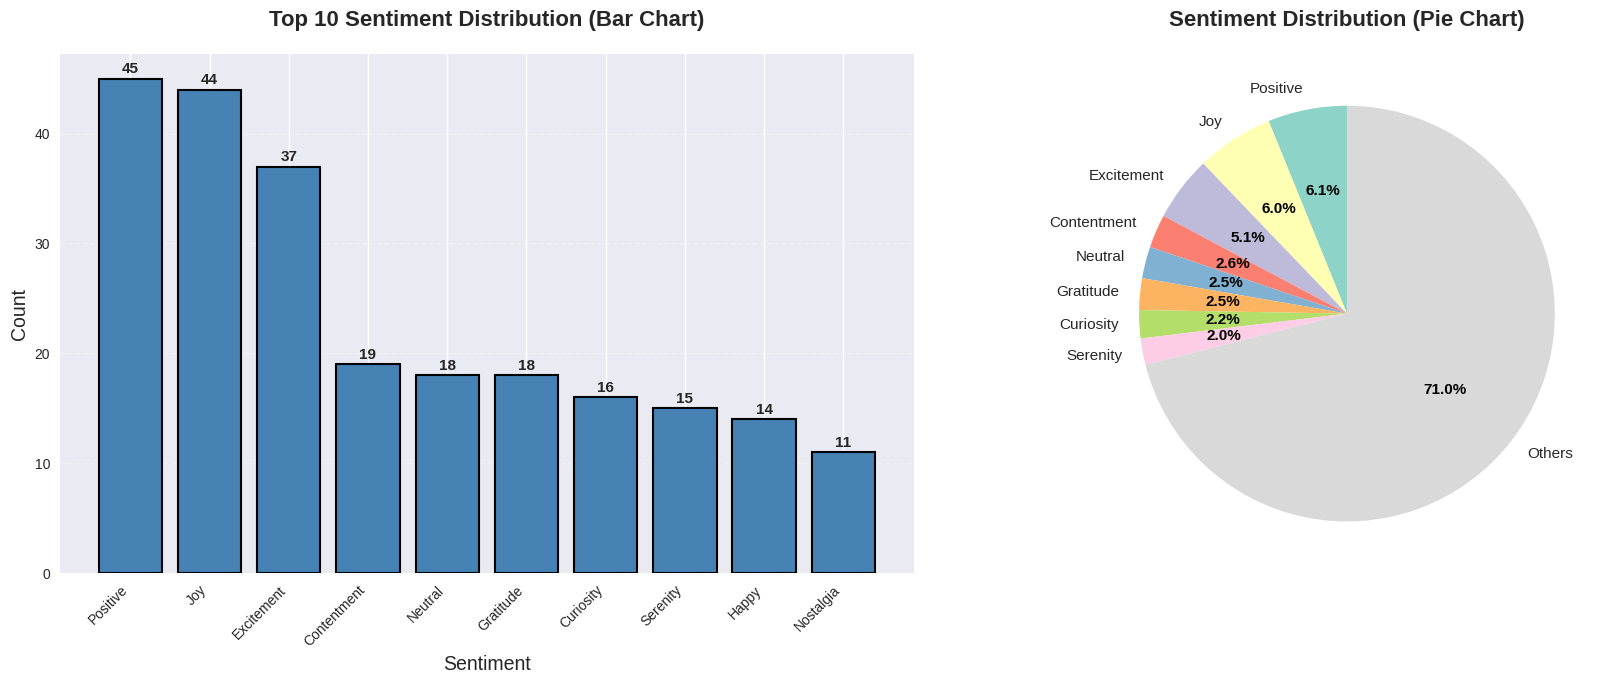


✓ Top 10 sentiments displayed
✓ Total unique sentiments: 191


In [49]:
# 1. SENTIMENT ANALYSIS (优化版)
# ============================================
print("\n" + "="*60)
print("1. SENTIMENT DISTRIBUTION ANALYSIS")
print("="*60)

# 只取前10个最常见的情感，避免图表过于拥挤
top_sentiments = df['Sentiment'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# 柱状图 - 只显示前10
axes[0].bar(range(len(top_sentiments)), top_sentiments.values, 
           color='steelblue', edgecolor='black', linewidth=1.5)
axes[0].set_xticks(range(len(top_sentiments)))
axes[0].set_xticklabels(top_sentiments.index, rotation=45, ha='right')
axes[0].set_title('Top 10 Sentiment Distribution (Bar Chart)', 
                 fontsize=16, fontweight='bold', pad=20)
axes[0].set_xlabel('Sentiment', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# 添加数值标签
for i, v in enumerate(top_sentiments.values):
    axes[0].text(i, v + 0.5, str(v), ha='center', 
                fontweight='bold', fontsize=11)

# 饼图 - 前8个 + Others
top8 = df['Sentiment'].value_counts().head(8)
others = df['Sentiment'].value_counts()[8:].sum()

if others > 0:
    pie_data = pd.concat([top8, pd.Series({'Others': others})])
else:
    pie_data = top8

colors = plt.cm.Set3(range(len(pie_data)))
wedges, texts, autotexts = axes[1].pie(pie_data, labels=pie_data.index, 
                                        autopct='%1.1f%%',
                                        startangle=90, colors=colors,
                                        textprops={'fontsize': 11})

# 让百分比更清晰
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

axes[1].set_title('Sentiment Distribution (Pie Chart)', 
                 fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('1_sentiment_distribution_improved.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Top 10 sentiments displayed")
print(f"✓ Total unique sentiments: {df['Sentiment'].nunique()}")


2. TEMPORAL TREND ANALYSIS


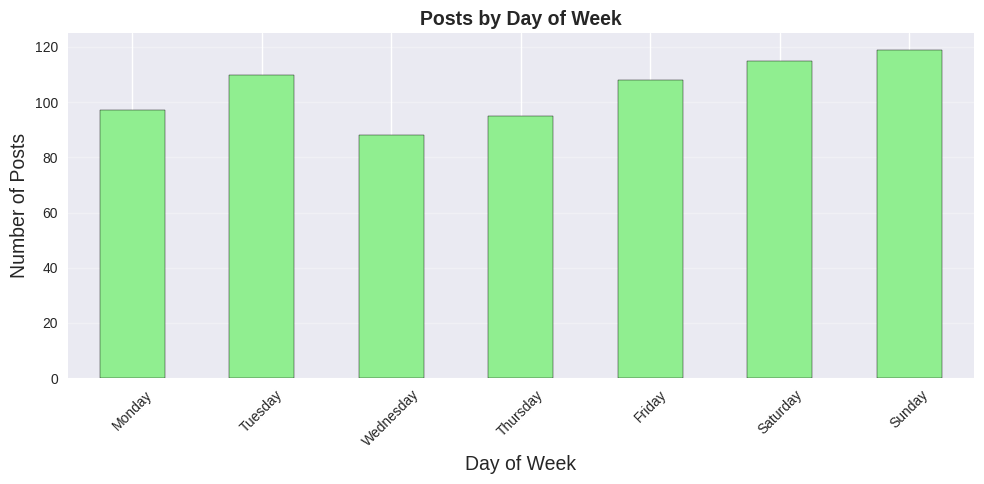


Most active day: Sunday
Posts on that day: 119


In [51]:
# ============================================
# 2. TEMPORAL ANALYSIS (时间趋势分析)
# ============================================
print("\n" + "="*60)
print("2. TEMPORAL TREND ANALYSIS")
print("="*60)

if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # .1 按星期几统计
    plt.figure(figsize=(10, 5))
    
    df['DayOfWeek'] = df['Timestamp'].dt.day_name()
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_counts = df['DayOfWeek'].value_counts().reindex(day_order)
    
    day_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title('Posts by Day of Week', fontsize=14, fontweight='bold')
    plt.xlabel('Day of Week')
    plt.ylabel('Number of Posts')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('2c_day_of_week.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\nMost active day: {day_counts.idxmax()}")
    print(f"Posts on that day: {day_counts.max()}")


3. USER ENGAGEMENT ANALYSIS

--- Engagement Statistics ---
Average Likes: 42.90
Average Retweets: 21.51

Sentiment with highest engagement (Likes):
Sentiment
Motivation      80.000000
Mesmerizing     80.000000
Wonder          73.333333
Energy          70.000000
Mindfulness     70.000000
                  ...    
Boredom         20.000000
Numbness        18.666667
Jealousy        18.333333
Resentment      18.333333
Helplessness    15.000000
Name: Likes, Length: 191, dtype: float64


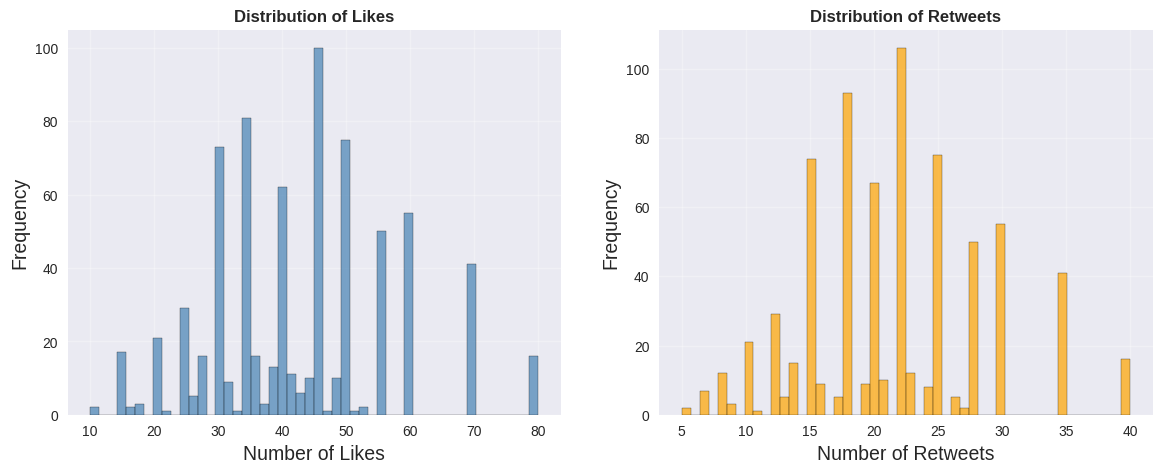

In [65]:
# 3. USER ENGAGEMENT ANALYSIS
# ============================================
print("\n" + "="*60)
print("3. USER ENGAGEMENT ANALYSIS")
print("="*60)

if 'Likes' in df.columns and 'Retweets' in df.columns:
    
    # 3.1 参与度统计
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Likes 分布
    axes[0].hist(df['Likes'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    axes[0].set_title('Distribution of Likes', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Number of Likes')
    axes[0].set_ylabel('Frequency')
    axes[0].grid(alpha=0.3)

    # Retweets 分布
    axes[1].hist(df['Retweets'], bins=50, color='orange', edgecolor='black', alpha=0.7)
    axes[1].set_title('Distribution of Retweets', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Number of Retweets')
    axes[1].set_ylabel('Frequency')
    axes[1].grid(alpha=0.3)

    print("\n--- Engagement Statistics ---")
    print(f"Average Likes: {df['Likes'].mean():.2f}")
    print(f"Average Retweets: {df['Retweets'].mean():.2f}")
    print(f"\nSentiment with highest engagement (Likes):")
    print(avg_likes)


4. PLATFORM-SPECIFIC ANALYSIS


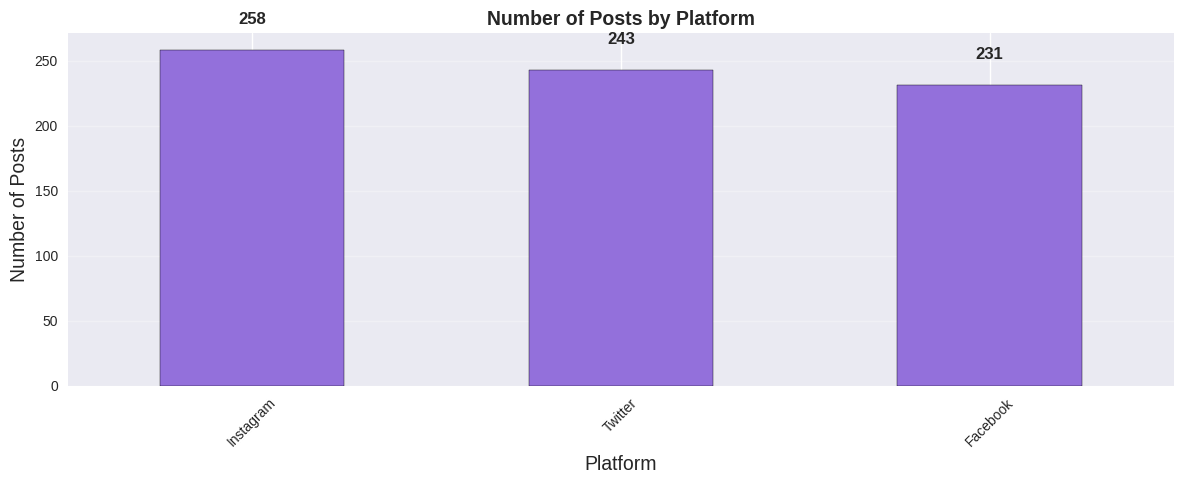


--- Platform Statistics ---
Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64


<Figure size 1200x500 with 0 Axes>

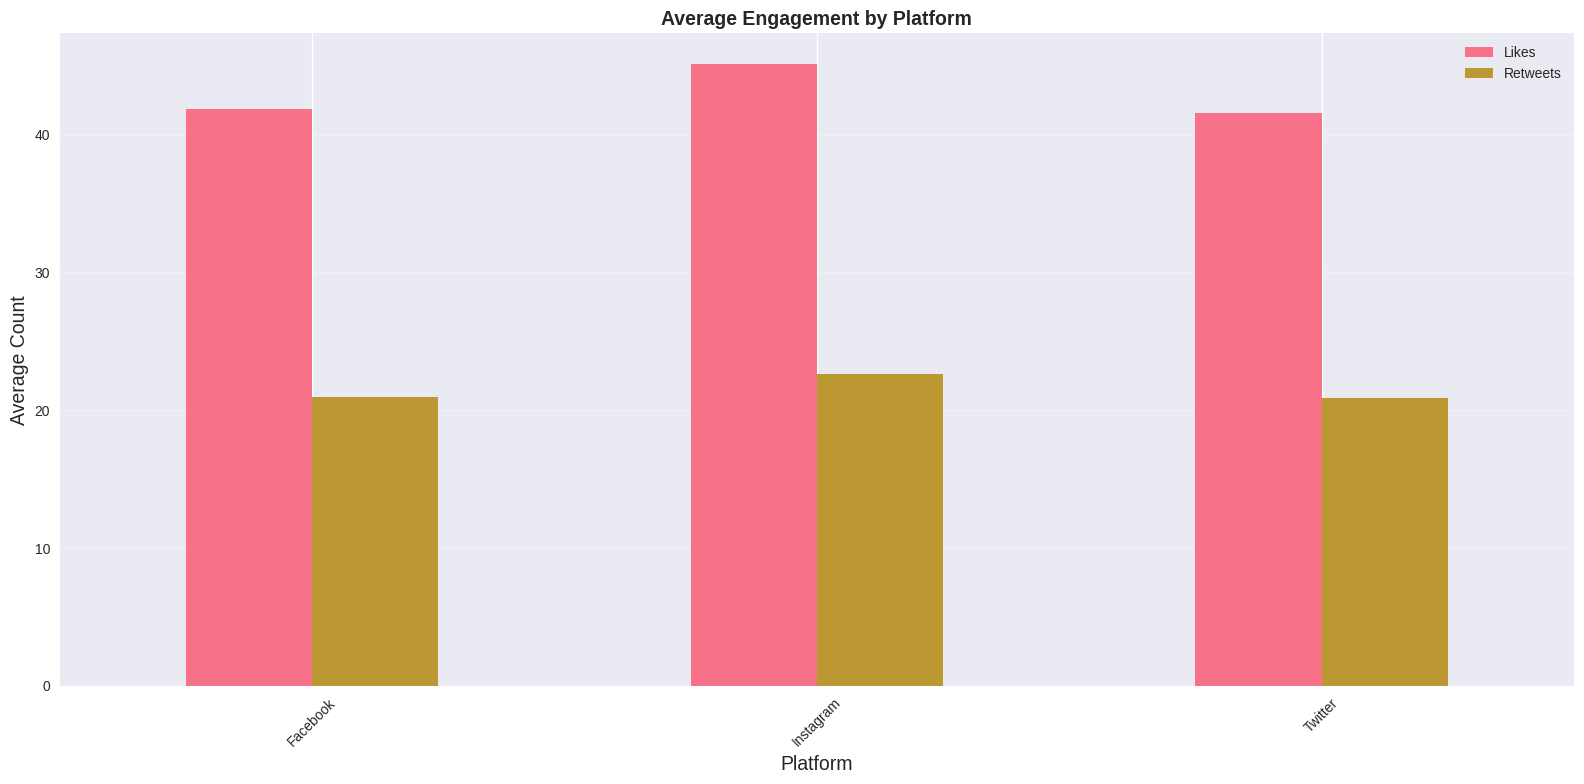


--- Platform Engagement ---
               Likes   Retweets
Platform                       
Facebook   41.870130  20.969697
Instagram  45.089147  22.600775
Twitter    41.559671  20.860082


In [67]:
# ============================================
# 4. PLATFORM-SPECIFIC ANALYSIS
# ============================================
print("\n" + "="*60)
print("4. PLATFORM-SPECIFIC ANALYSIS")
print("="*60)

if 'Platform' in df.columns:
    
    # 4.1 各平台的帖子数量
    plt.figure(figsize=(12, 5))
    
    platform_counts = df['Platform'].value_counts()
    platform_counts.plot(kind='bar', color='mediumpurple', edgecolor='black')
    
    plt.title('Number of Posts by Platform', fontsize=14, fontweight='bold')
    plt.xlabel('Platform')
    plt.ylabel('Number of Posts')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    
    # 添加数值标签
    for i, v in enumerate(platform_counts):
        plt.text(i, v + 20, str(v), ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('4_platform_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n--- Platform Statistics ---")
    print(platform_counts)
    
    # 4.2 各平台的平均参与度
    if 'Likes' in df.columns and 'Retweets' in df.columns:
        plt.figure(figsize=(12, 5))
        
        platform_engagement = df.groupby('Platform')[['Likes', 'Retweets']].mean()
        platform_engagement.plot(kind='bar')
        
        plt.title('Average Engagement by Platform', fontsize=14, fontweight='bold')
        plt.xlabel('Platform')
        plt.ylabel('Average Count')
        plt.legend(['Likes', 'Retweets'])
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.savefig('4c_platform_engagement.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("\n--- Platform Engagement ---")
        print(platform_engagement)


5. HASHTAG & TOPIC ANALYSIS


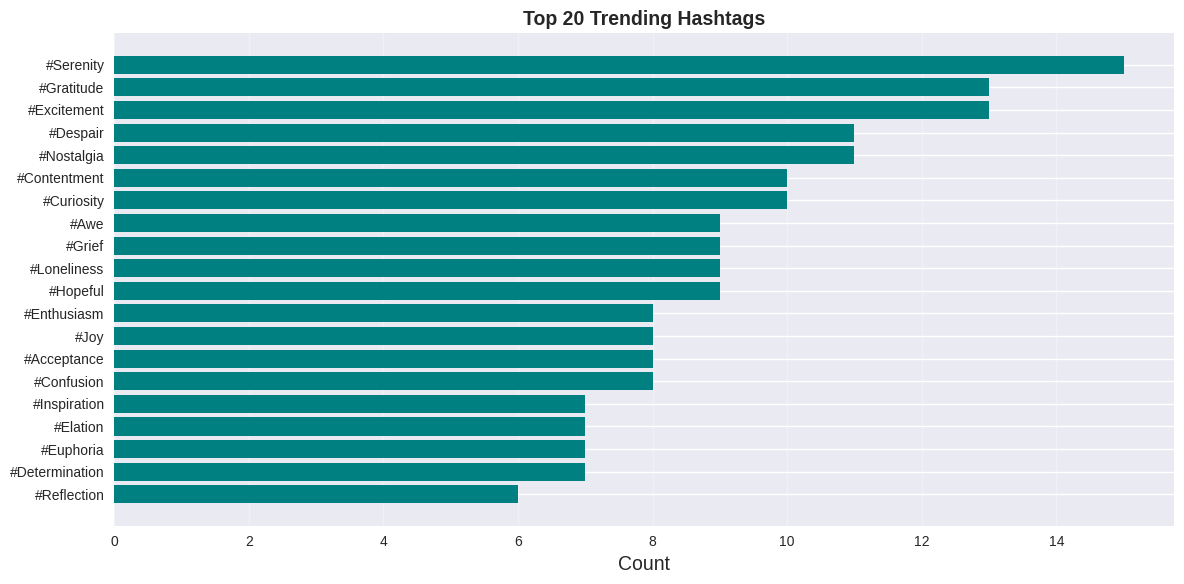


--- Top 10 Hashtags ---
        Hashtag  Count
0     #Serenity     15
1    #Gratitude     13
2   #Excitement     13
3      #Despair     11
4    #Nostalgia     11
5  #Contentment     10
6    #Curiosity     10
7          #Awe      9
8        #Grief      9
9   #Loneliness      9


In [70]:
# ============================================
# 5. HASHTAG & TOPIC ANALYSIS
# ============================================
print("\n" + "="*60)
print("5. HASHTAG & TOPIC ANALYSIS")
print("="*60)

if 'Hashtags' in df.columns:
    
    # 提取所有 hashtags
    all_hashtags = []
    for hashtags in df['Hashtags'].dropna():
        if isinstance(hashtags, str):
            all_hashtags.extend(hashtags.split())
    
    if all_hashtags:
        # 5.1 Top 20 热门 hashtags
        from collections import Counter
        hashtag_counts = Counter(all_hashtags)
        top_hashtags = pd.DataFrame(hashtag_counts.most_common(20),
                                    columns=['Hashtag', 'Count'])
        
        plt.figure(figsize=(12, 6))
        plt.barh(range(len(top_hashtags)), top_hashtags['Count'], color='teal')
        plt.yticks(range(len(top_hashtags)), top_hashtags['Hashtag'])
        plt.xlabel('Count')
        plt.title('Top 20 Trending Hashtags', fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.savefig('5_top_hashtags.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("\n--- Top 10 Hashtags ---")
        print(top_hashtags.head(10))



6. GEOGRAPHICAL TREND ANALYSIS


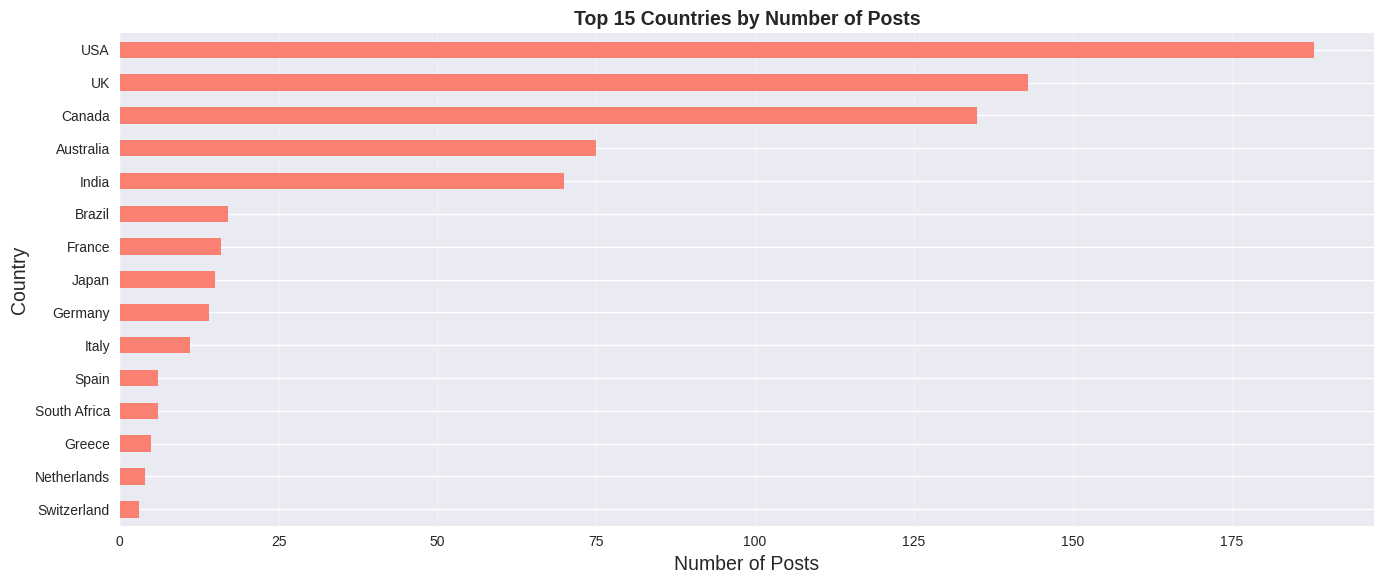


--- Top 10 Countries ---
Country
USA          188
UK           143
Canada       135
Australia     75
India         70
Brazil        17
France        16
Japan         15
Germany       14
Italy         11
Name: count, dtype: int64


<Figure size 1400x800 with 0 Axes>

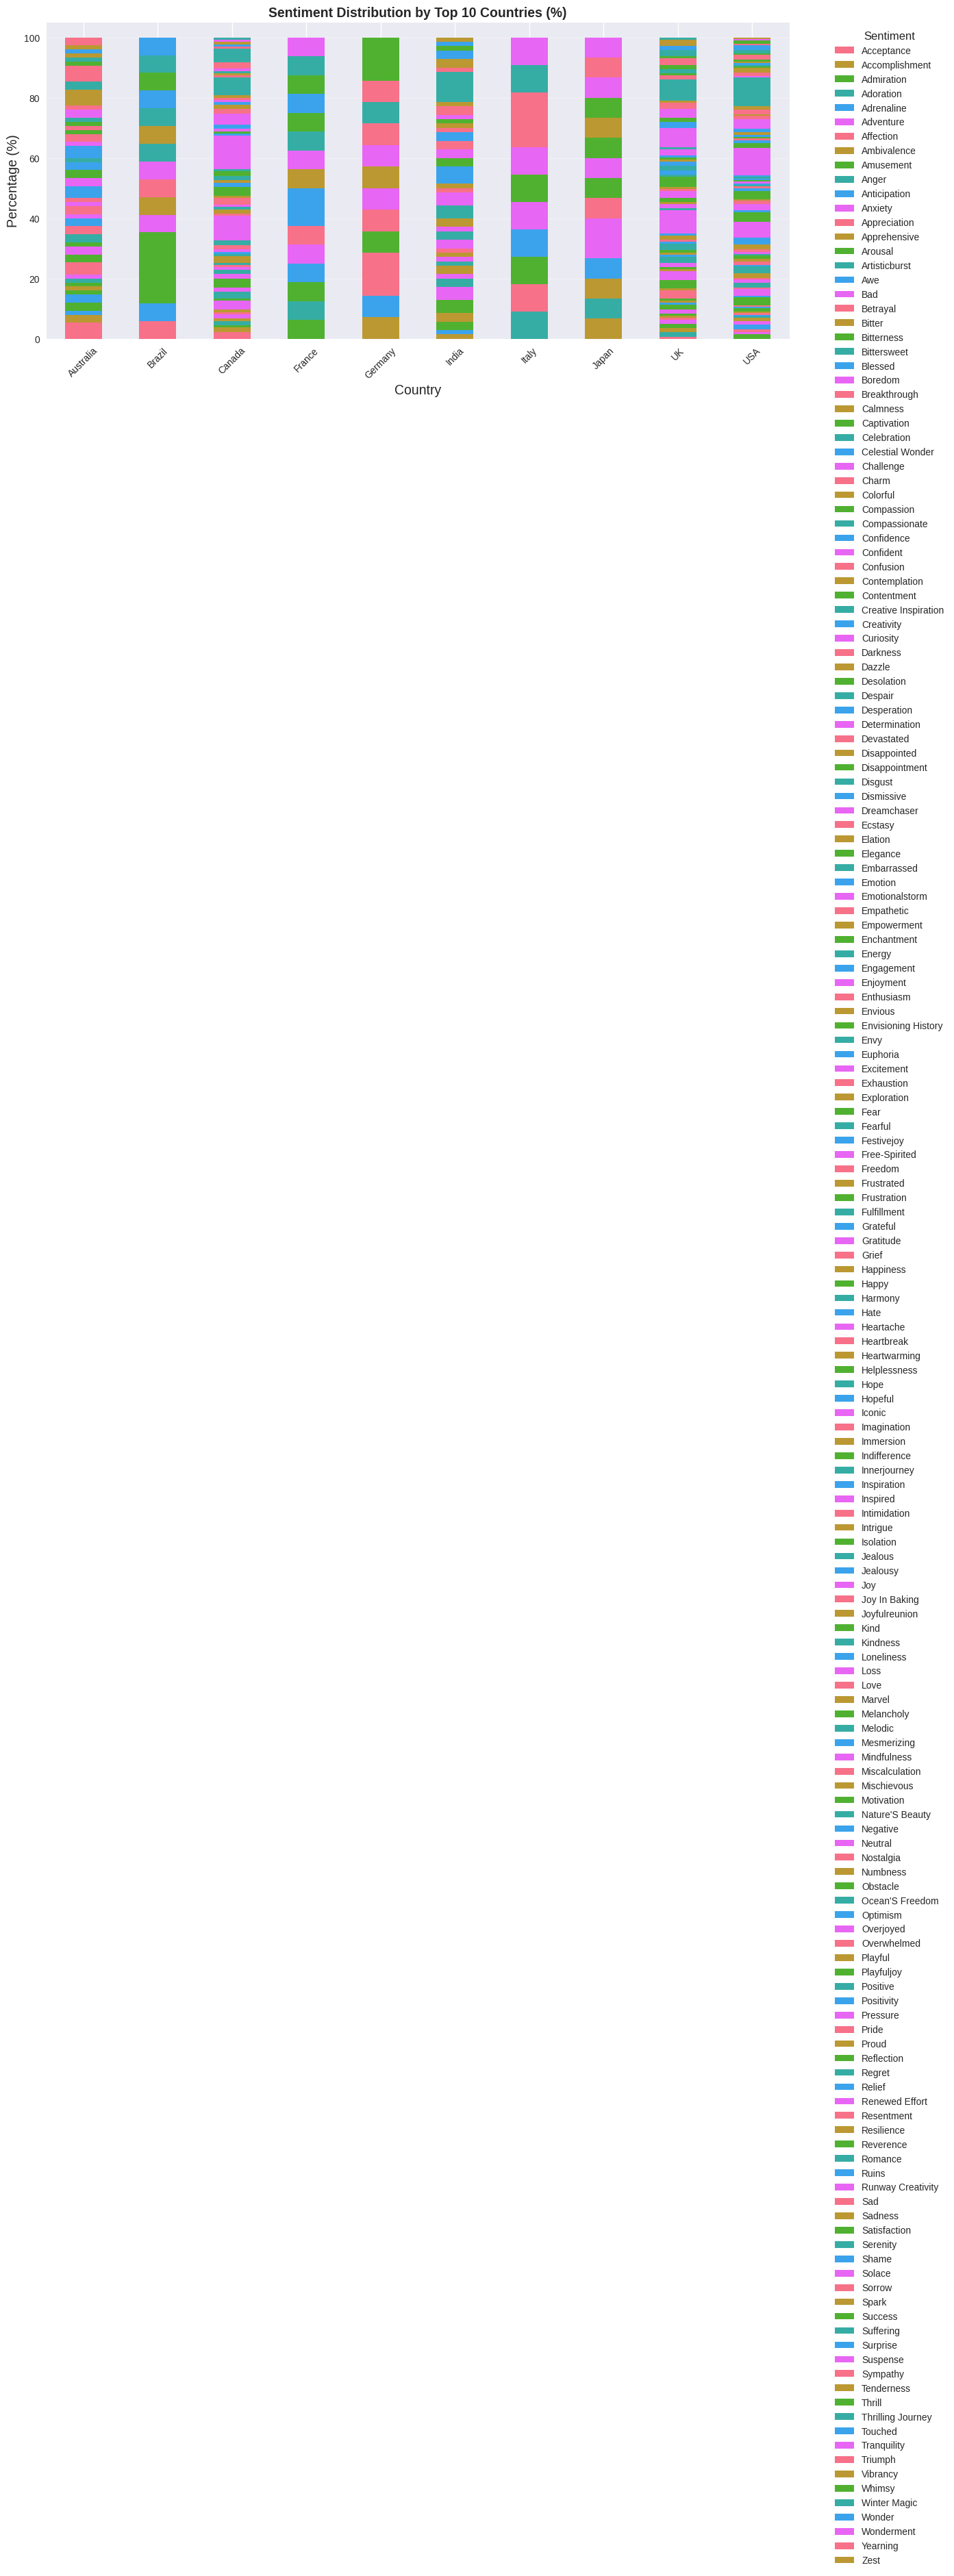

In [71]:
# ============================================
# 6. GEOGRAPHICAL ANALYSIS
# ============================================
print("\n" + "="*60)
print("6. GEOGRAPHICAL TREND ANALYSIS")
print("="*60)

if 'Country' in df.columns:
    
    # 6.1 各国帖子数量
    plt.figure(figsize=(14, 6))
    
    country_counts = df['Country'].value_counts().head(15)
    country_counts.plot(kind='barh', color='salmon')
    
    plt.title('Top 15 Countries by Number of Posts', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Posts')
    plt.ylabel('Country')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('6_country_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n--- Top 10 Countries ---")
    print(country_counts.head(10))
    
    # 6.2 各国情感分布
    plt.figure(figsize=(14, 8))
    
    top_countries = df['Country'].value_counts().head(10).index
    country_sentiment = df[df['Country'].isin(top_countries)]
    
    sentiment_by_country = pd.crosstab(country_sentiment['Country'],
                                       country_sentiment['Sentiment'],
                                       normalize='index') * 100
    
    sentiment_by_country.plot(kind='bar', stacked=True, figsize=(14, 6))
    plt.title('Sentiment Distribution by Top 10 Countries (%)', fontsize=14, fontweight='bold')
    plt.xlabel('Country')
    plt.ylabel('Percentage (%)')
    plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('6b_country_sentiment.png', dpi=300, bbox_inches='tight')
    plt.show()


7. TEXT ANALYSIS


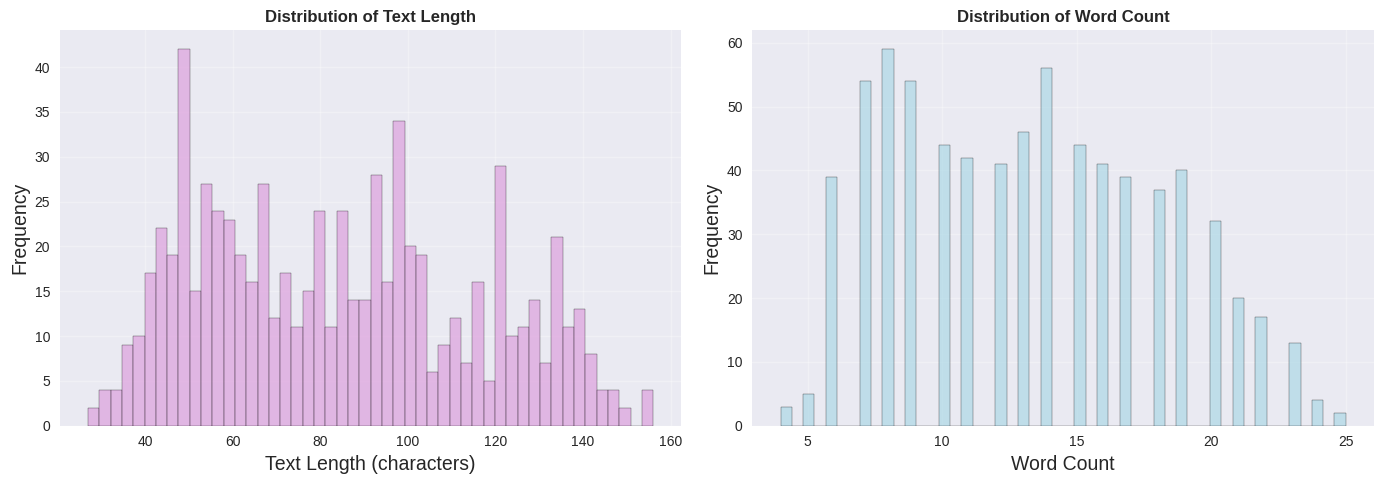


Average text length: 84.43 characters
Average word count: 13.21 words


In [73]:
# ============================================
# 7. TEXT ANALYSIS
# ============================================
print("\n" + "="*60)
print("7. TEXT ANALYSIS")
print("="*60)

if 'Text_Length' in df.columns and 'Word_Count' in df.columns:
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # 7.1 文本长度分布
    axes[0].hist(df['Text_Length'], bins=50, color='plum', edgecolor='black', alpha=0.7)
    axes[0].set_title('Distribution of Text Length', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Text Length (characters)')
    axes[0].set_ylabel('Frequency')
    axes[0].grid(alpha=0.3)
    
    # 7.2 词数分布
    axes[1].hist(df['Word_Count'], bins=50, color='lightblue', edgecolor='black', alpha=0.7)
    axes[1].set_title('Distribution of Word Count', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Word Count')
    axes[1].set_ylabel('Frequency')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('7_text_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\nAverage text length: {df['Text_Length'].mean():.2f} characters")
    print(f"Average word count: {df['Word_Count'].mean():.2f} words")


8. COMPREHENSIVE CORRELATION ANALYSIS


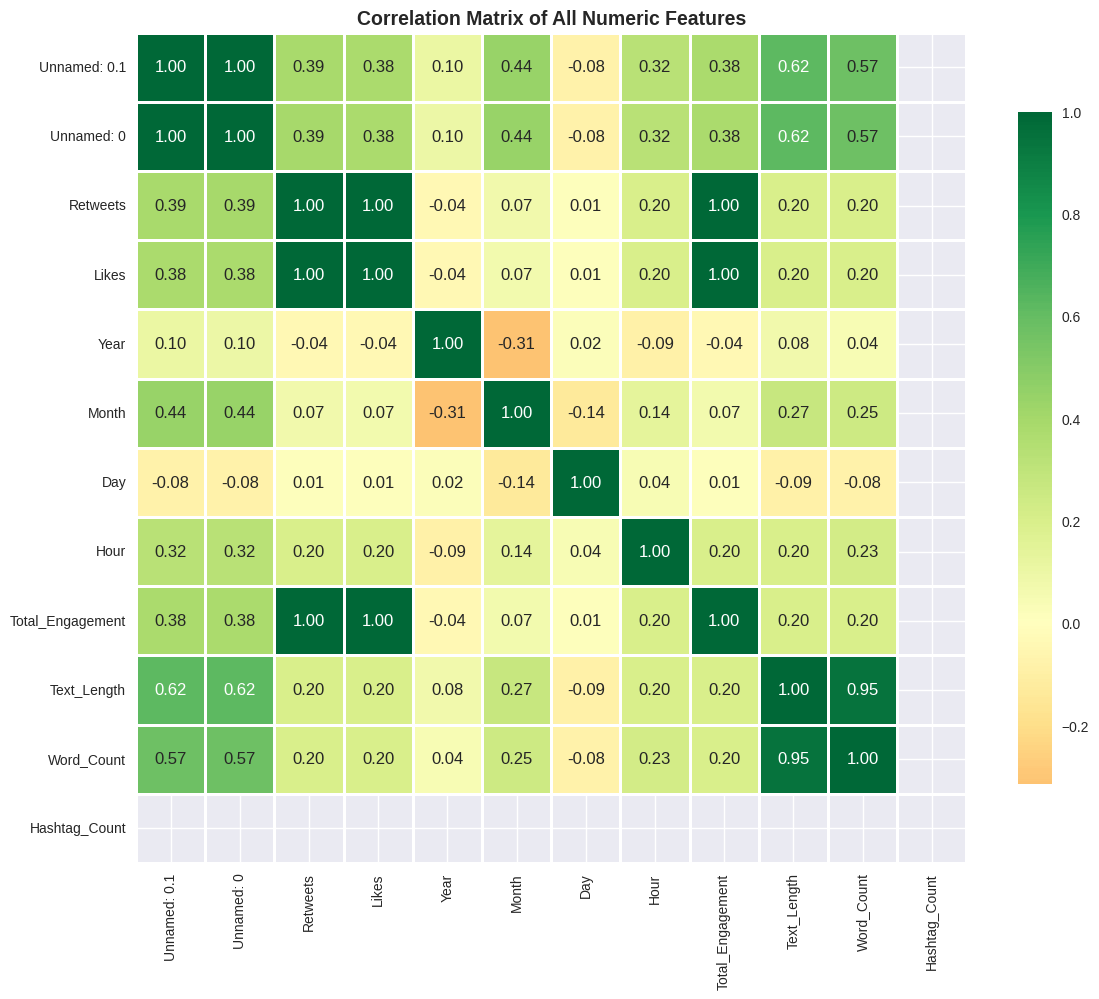


--- Strong Correlations (|r| > 0.5) ---
Unnamed: 0.1 <-> Unnamed: 0: 1.000
Unnamed: 0.1 <-> Text_Length: 0.621
Unnamed: 0.1 <-> Word_Count: 0.570
Unnamed: 0 <-> Text_Length: 0.622
Unnamed: 0 <-> Word_Count: 0.571
Retweets <-> Likes: 0.998
Retweets <-> Total_Engagement: 0.999
Likes <-> Total_Engagement: 1.000
Text_Length <-> Word_Count: 0.948


In [74]:
# ============================================
# 8. CORRELATION MATRIX (综合相关性分析)
# ============================================
print("\n" + "="*60)
print("8. COMPREHENSIVE CORRELATION ANALYSIS")
print("="*60)

# 选择数值型列进行相关性分析
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols) > 1:
    plt.figure(figsize=(12, 10))
    
    correlation_matrix = df[numeric_cols].corr()
    
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlGn',
                center=0, square=True, linewidths=1, 
                cbar_kws={"shrink": 0.8})
    
    plt.title('Correlation Matrix of All Numeric Features', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('8_correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n--- Strong Correlations (|r| > 0.5) ---")
    # 找出强相关性
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.5:
                print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")


In [76]:
# ============================================
# 9. KEY INSIGHTS SUMMARY
# ============================================
print("\n" + "="*60)
print("9. KEY INSIGHTS SUMMARY")
print("="*60)

print("\n📊 SUMMARY OF KEY FINDINGS:")
print("-" * 60)

# 情感
most_common_sentiment = df['Sentiment'].value_counts().idxmax()
print(f"✓ Most common sentiment: {most_common_sentiment}")
print(f"  ({(df['Sentiment'].value_counts().max()/len(df)*100):.1f}% of all posts)")

# 参与度
if 'Likes' in df.columns and 'Retweets' in df.columns:
    high_engagement_sentiment = df.groupby('Sentiment')['Total_Engagement'].mean().idxmax()
    print(f"\n✓ Sentiment with highest engagement: {high_engagement_sentiment}")
    print(f"  Average engagement: {df.groupby('Sentiment')['Total_Engagement'].mean().max():.0f}")

# 平台
if 'Platform' in df.columns:
    most_active_platform = df['Platform'].value_counts().idxmax()
    print(f"\n✓ Most active platform: {most_active_platform}")
    print(f"  ({(df['Platform'].value_counts().max()/len(df)*100):.1f}% of all posts)")

# 地理
if 'Country' in df.columns:
    top_country = df['Country'].value_counts().idxmax()
    print(f"\n✓ Top country: {top_country}")
    print(f"  ({df['Country'].value_counts().max()} posts)")

# 时间
if 'Timestamp' in df.columns:
    date_range = f"{df['Timestamp'].min().date()} to {df['Timestamp'].max().date()}"
    print(f"\n✓ Data time range: {date_range}")
    print(f"  Total days: {(df['Timestamp'].max() - df['Timestamp'].min()).days}")

print("\n" + "="*60)
print("EDA COMPLETE!")
print("="*60)


9. KEY INSIGHTS SUMMARY

📊 SUMMARY OF KEY FINDINGS:
------------------------------------------------------------
✓ Most common sentiment: Positive
  (6.1% of all posts)

✓ Sentiment with highest engagement: Mesmerizing
  Average engagement: 120

✓ Most active platform: Instagram
  (35.2% of all posts)

✓ Top country: USA
  (188 posts)

✓ Data time range: 2010-05-15 to 2023-10-22
  Total days: 4908

EDA COMPLETE!
